In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.makedirs('Figure_1', exist_ok=True)

# FIGURE 1
### A principal axis of the neonatal cortex indexed by multi-modal MRI

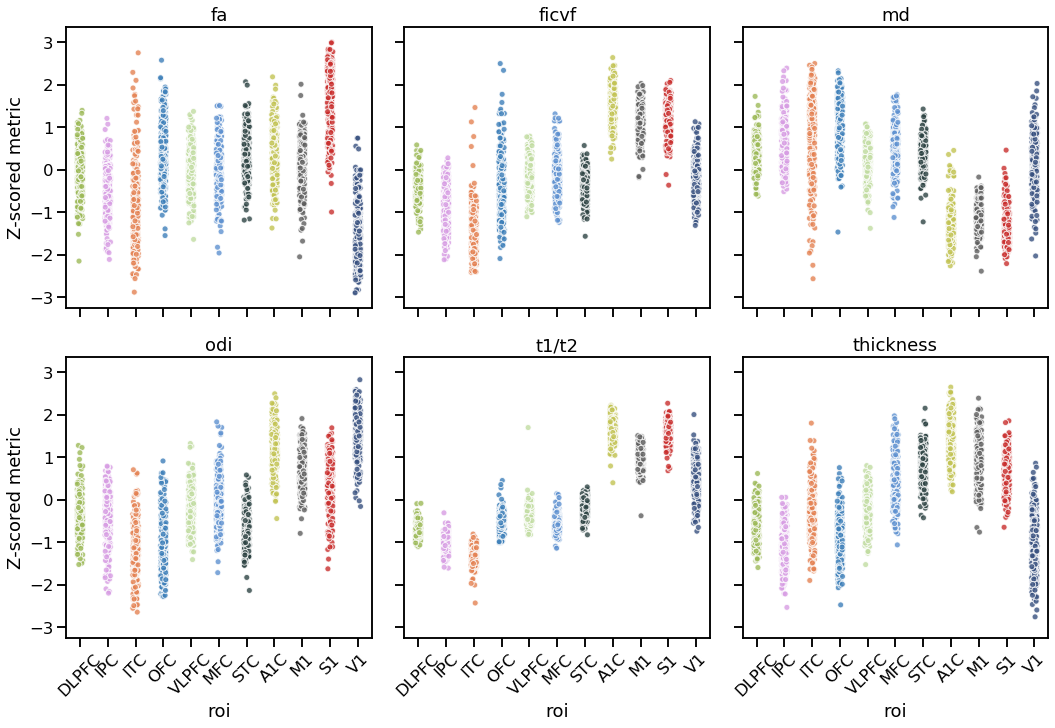

In [63]:
# FIGURE 1B
# Load regional metrics for term cohort
scaled_clean_data = pd.read_csv('../data/processed_imaging/regional-multimodal-metrics-term-data-clean-zscore.csv')
# rename
scaled_clean_data['metric'].replace('myelin','t1/t2', inplace=True)

# regions
drop_cols = ['ids', 'sess', 'male', 'age_at_birth', 'age_at_scan', 'metric']
regions = list(scaled_clean_data.drop(drop_cols, axis='columns').columns)

# reorder
order = np.array([1,2,3,6,10,5,8,0,4,7,9])
regions = [regions[o] for o in order]

# melt
long_data = pd.melt(scaled_clean_data, id_vars=['ids','sess','age_at_scan','age_at_birth','male','metric'],
                    var_name='roi', value_name='Z-scored metric')

# plot
colours = [  '#9cb957',
             '#d79de3',
             '#e48253',
             '#3d7fb9',
             '#c1dca1',
             '#5e91d0',
             '#2d4343',
             '#c2c353',
             '#5e5e5e',
             '#c92e2d',
             '#37507f'  ]

sns.set_context('talk')
g = sns.catplot(x="roi", y="Z-scored metric",
            hue="roi",
            col="metric",
            hue_order=regions,
            order=regions,
            data=long_data,
            col_wrap=3,
            sharex=True, sharey=True,
            palette=dict(zip(regions, colours)),
            jitter=1, alpha=.8, s=6, edgecolor='w', linewidth=1)
sns.despine(top=False, right=False)
g.set_xticklabels(labels=regions,rotation=45)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# save out
g.savefig('Figure_1/Figure_1B.png')

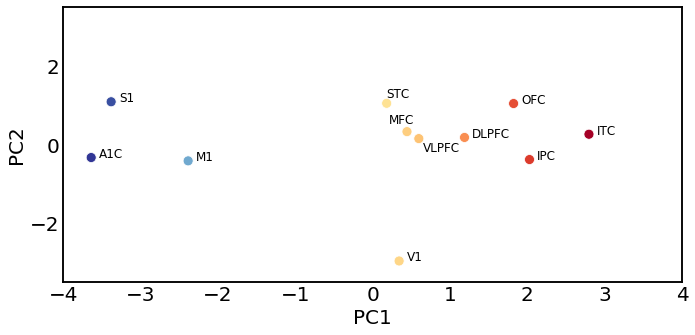

In [64]:
# Figure 1C
# load results from A__principal_components.py
mean_PCs = pd.read_csv('../results/PCA/mean-regional-principal-components.csv')
mean_PCs['order'] = [8,0,1,2,7,5,3,9,6,10,4]

# scatter
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5))

g = sns.scatterplot(x='PC1', y='PC2',
                hue='PC1', palette='RdYlBu_r', s=100, data=mean_PCs, ax=ax1)
g.set_xlim(-4,4)
g.set_xlabel('PC1', fontsize=20)
g.set_ylim(-3.5,3.5)
g.set_ylabel('PC2', fontsize=20)
l = g.legend()
l.remove()
plt.tick_params(axis='both', which='major', labelsize=20, length=0)

plt.text(1.28821666, 0.1786681, 'DLPFC', fontsize=12)
plt.text(2.12842571, -0.38226916, 'IPC', fontsize=12)
plt.text(2.89700453, 0.2603563, 'ITC', fontsize=12)
plt.text(1.92268099, 1.04029276, 'OFC', fontsize=12)
plt.text(0.64756212, -0.18158481, 'VLPFC', fontsize=12)
plt.text(0.20445649, 0.52690845, 'MFC', fontsize=12)
plt.text(0.18186962, 1.1862678 , 'STC', fontsize=12)
plt.text(-3.53813618, -0.33143701, 'A1C', fontsize=12)
plt.text(-2.28478104, -0.4155017 , 'M1', fontsize=12)
plt.text(-3.28016872,  1.08533431, 'S1', fontsize=12)
plt.text(0.4428698 , -2.95820467, 'V1', fontsize=12)

plt.tight_layout()
plt.savefig('Figure_1/Figure_1C.png')

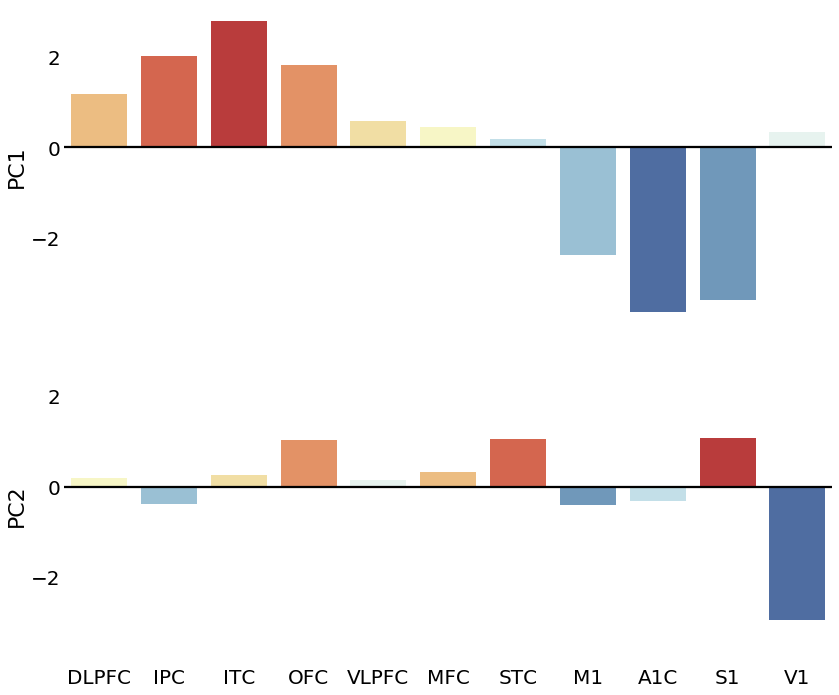

In [65]:
# Figure 1D
# load results from A__principal_components.py
mean_PCs = pd.read_csv('../results/PCA/mean-regional-principal-components.csv')
mean_PCs['order'] = [8,0,1,2,7,5,3,9,6,10,4]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,10))

g=sns.barplot('order', 'PC1', data=mean_PCs, hue='PC1', dodge=False, palette='RdYlBu_r', ax=ax1)
ax1.get_legend().remove()
h=sns.barplot('order', 'PC2', data=mean_PCs, hue='PC2', dodge=False, palette='RdYlBu_r', ax=ax2)
ax2.get_legend().remove()
ax1.axhline(0, color='black')
ax2.axhline(0, color='black')
g.tick_params(axis='both', labelsize=20, length = 0)
h.tick_params(axis='both', labelsize=20, length = 0)
sns.despine(bottom=True, left=True)
ax1.set_xlabel('')
ax1.set_ylabel('PC1', fontsize=22)

ax2.set_xlabel('')
ax2.set_ylabel('PC2', fontsize=22)

ax2.set_xticklabels(mean_PCs.sort_values(by='order')['region'])

plt.tight_layout()
plt.savefig('Figure_1/Figure_1D.png')
